In [31]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/RecPatron/BD/DatosFrame/MG_Reactores2'
ruta_excel = '/home/waldos/Documents/2doCodigo/RecPatron/BD/DatosFrame/Datos frames.xlsx'

In [32]:
df_excel = pd.read_excel(ruta_excel) 

In [33]:
df_excel.head()

,Nombre imagen,Biomasa g/L
0,roi_000,0.150
1,roi_001,0.165
2,roi_002,0.177
3,roi_003,0.145
4,roi_004,0.158


Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [34]:
#Crear lista para almacenar datos de imagenes
directorio = {'Imagen':[],'Biomasa g/L':[],'Etiqueta': []}
for nombre_archivo in os.listdir(ruta_carpeta_inicial):
    try:
        ruta_archivo = os.path.join(ruta_carpeta_inicial, nombre_archivo)
        imagen_BGR = cv2.imread(ruta_archivo)

        imagen_RGB = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2RGB)

        imagen_redimensionada = cv2.resize(imagen_RGB,(150,150))
        nombre_archivo_busqueda = nombre_archivo.split('.')[0]
        biomasa = df_excel.loc[df_excel['Nombre imagen'] == nombre_archivo_busqueda, 'Biomasa g/L'].values[0]

        directorio['Imagen'].append(imagen_redimensionada)
        directorio['Biomasa g/L'].append(biomasa)
        directorio['Etiqueta'].append(nombre_archivo_busqueda)
                
            
    except Exception as e:
        print("Error en archivo:"+str(nombre_archivo)+":"+str(e))
            

Creamos el Dataset en formato Pandas

In [35]:
columnas = ['Imagen', 'Biomasa g/L','Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)

In [36]:
df.head()

,Imagen,Biomasa g/L,Etiqueta
0,"[[[45, 107, 1], [43, 106, 0], [43, 106, 0], [5...",1.000,roi_329
1,"[[[16, 113, 0], [14, 113, 0], [14, 112, 0], [1...",1.667,roi_539
2,"[[[0, 82, 0], [0, 81, 0], [0, 82, 0], [0, 83, ...",2.539,roi_859
3,"[[[55, 105, 15], [56, 106, 16], [56, 107, 17],...",0.667,roi_220
4,"[[[100, 108, 57], [102, 110, 59], [100, 108, 5...",0.333,roi_063


Vemos los formatos en los cuales está el Dataset

In [37]:
print(df['Imagen'][0].shape)

(150, 150, 3)


Guardar el dataset

In [43]:
df.to_hdf('BD_Biomasa.h5', key='dataframe', mode = 'w')

/tmp/ipykernel_57075/1404594709.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['Imagen', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Biomasa.h5', key='dataframe', mode = 'w')


Leer archivo creado

In [39]:
import pandas as pd
df_HDF = pd.read_hdf('BD_Biomasa.h5')

In [40]:
print(df_HDF.shape[1])

3


In [41]:
df_HDF.head()

,Imagen,Biomasa g/L,Etiqueta
0,"[[[45, 107, 1], [43, 106, 0], [43, 106, 0], [5...",1.000,roi_329
1,"[[[16, 113, 0], [14, 113, 0], [14, 112, 0], [1...",1.667,roi_539
2,"[[[0, 82, 0], [0, 81, 0], [0, 82, 0], [0, 83, ...",2.539,roi_859
3,"[[[55, 105, 15], [56, 106, 16], [56, 107, 17],...",0.667,roi_220
4,"[[[100, 108, 57], [102, 110, 59], [100, 108, 5...",0.333,roi_063


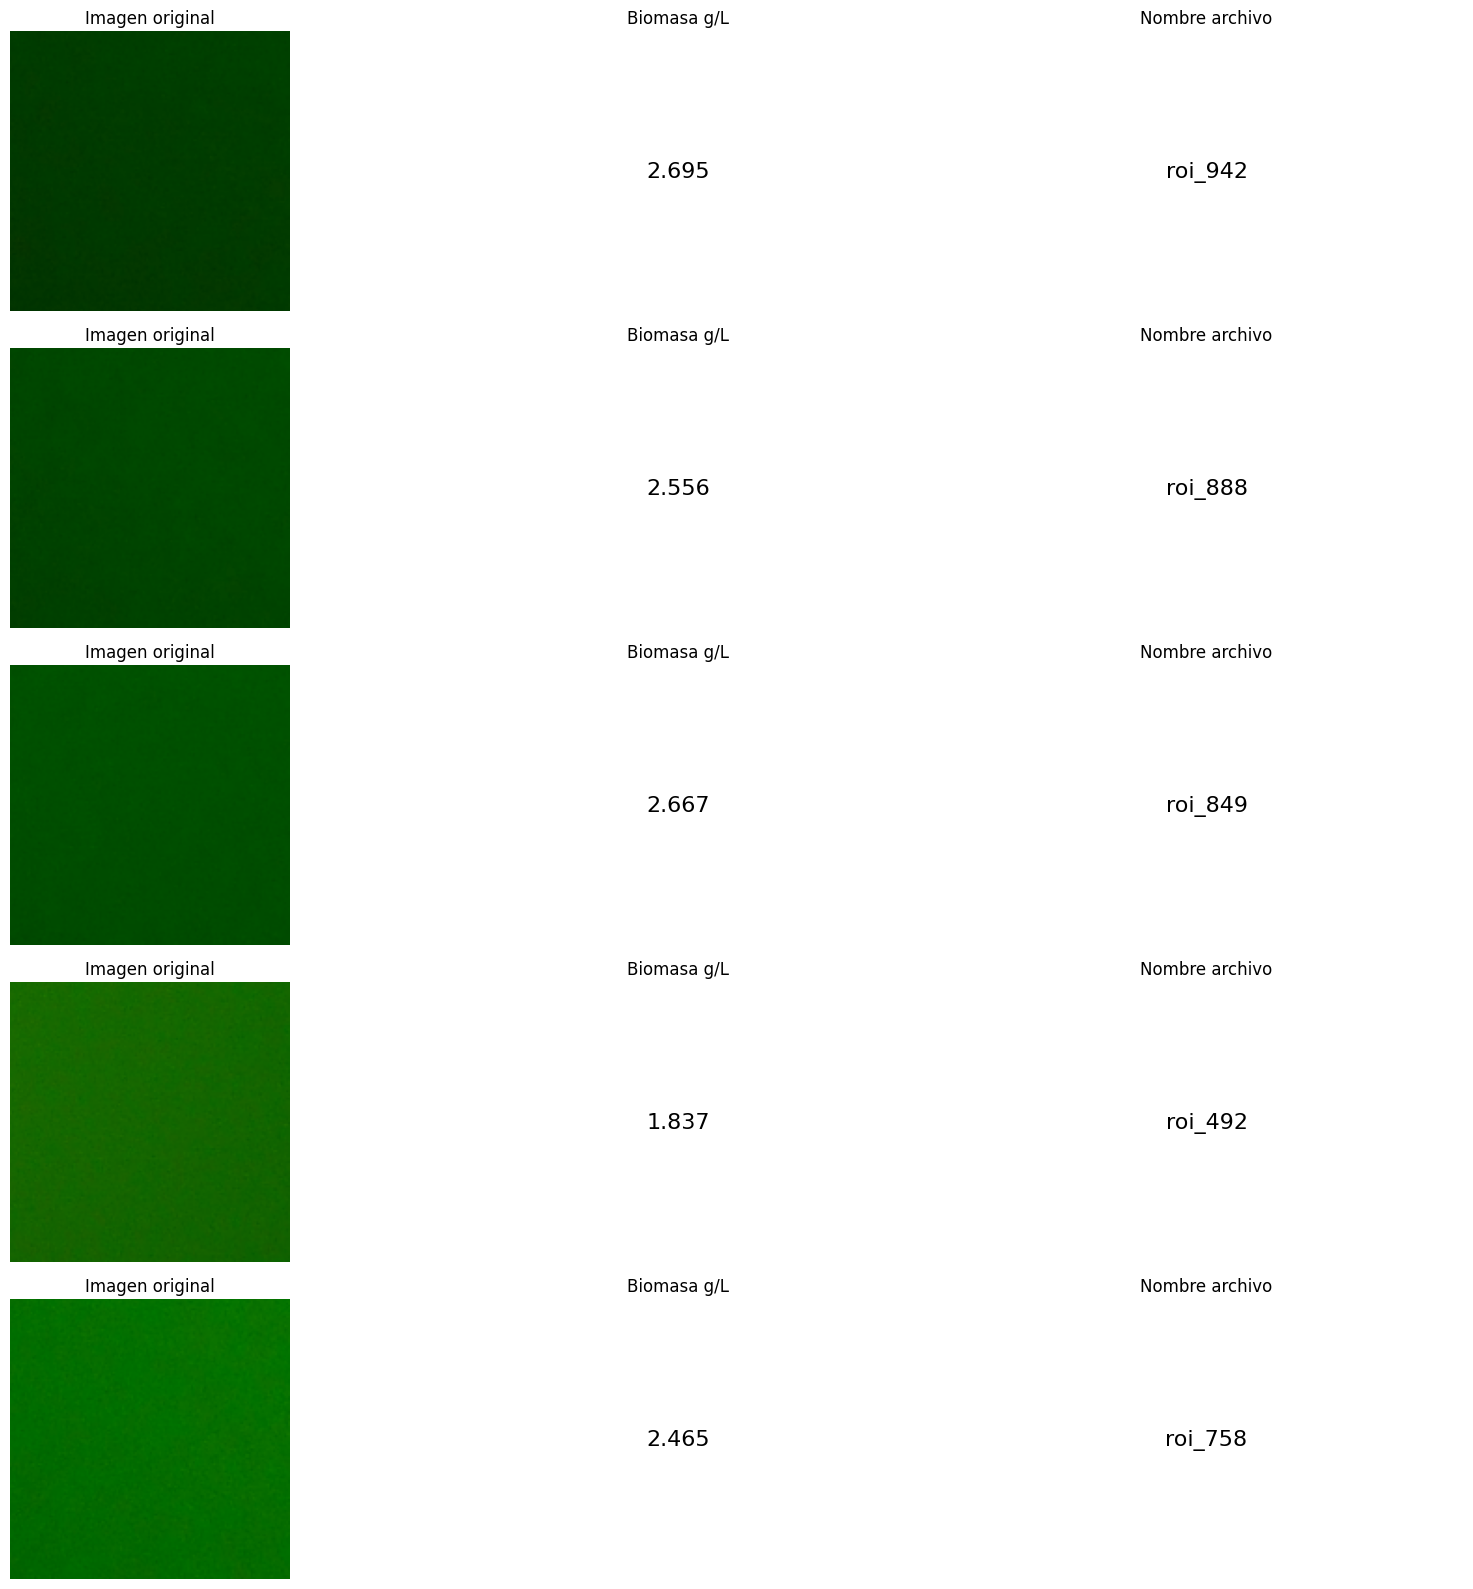

In [42]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')

    ax1 = axes[i,1]
    ax1.text(0.5, 0.5, row['Biomasa g/L'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax1.set_title('Biomasa g/L')
    ax1.axis('off')


    ax2 = axes[i,2]
    ax2.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax2.set_title('Nombre archivo')
    ax2.axis('off')
plt.tight_layout()
plt.show()
    
    
    